## Setup

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
data_dir = "/Users/davidmalmstrom/Documents/proj/data/flickr100m/"

In [3]:
nrows = 800000

## Load dataset data

In [4]:
dataset = pd.read_csv(data_dir + "yfcc100m_dataset", sep="\t", nrows=nrows, header=None)
dataset.columns = pd.read_csv(data_dir + "dataset_header").columns
dataset.set_index("Line_number", inplace=True)
dataset.head()

,Photo/video_identifier,Photo/video_hash,User_NSID,User_nickname,Date_taken,Date_uploaded,Capture_device,Title,Description,User_tags,...,Photo/video_page_URL,Photo/video_download_URL,License_name,License_URL,Photo/video_server_identifier,Photo/video_farm_identifier,Photo/video_secret,Photo/video_secret_original,Extension,Photos/video_marker_(0/1)
Line_number,,,,,,,,,,,,,,,,,,,,,
0,6985418911,4e2f7a26a1dfbf165a7e30bdabf7e72a,39089491@N00,nino63004,2012-02-16 09:56:37.0,1331840483,Canon+PowerShot+ELPH+310+HS,IMG_0520,NaN,"canon,canon+powershot+hs+310,carnival+escatay,...",...,http://www.flickr.com/photos/39089491@N00/6985...,http://farm8.staticflickr.com/7205/6985418911_...,Attribution-NonCommercial-NoDerivs License,http://creativecommons.org/licenses/by-nc-nd/2.0/,7205,8,df7747990d,692d7e0a7f,jpg,0
1,10201275523,6ae91cc04fe06697c9404a5360b9b62,55289779@N00,booledozer,2013-10-09 15:30:13.0,1381464628,Panasonic+DMC-ZS10,Images+from+the+intersection+of+Parliament+and...,NaN,NaN,...,http://www.flickr.com/photos/55289779@N00/1020...,http://farm6.staticflickr.com/5465/10201275523...,Attribution-ShareAlike License,http://creativecommons.org/licenses/by-sa/2.0/,5465,6,3e6ea67c7f,f400826feb,jpg,0
2,2297552664,b61f252678da02eaff453bce575cb6,8134076@N03,nathalie.cone,2008-02-27 08:14:36.0,1204166915,Canon+PowerShot+S2+IS,denise%27s+peanut+chicken,recipe+here%3A+%3Ca+href%3D%22http%3A%2F%2Fall...,NaN,...,http://www.flickr.com/photos/8134076@N03/22975...,http://farm4.staticflickr.com/3171/2297552664_...,Attribution-NonCommercial-NoDerivs License,http://creativecommons.org/licenses/by-nc-nd/2.0/,3171,4,1ee0e8855d,bed1547a29,jpg,0
3,7289030198,b545e6a773632e2e65e6ecf1bf385,53430201@N03,sarabeephoto,2012-05-28 00:23:30.0,1338233199,Canon+EOS+DIGITAL+REBEL+XSi,blip+fest+2012+night+3,NaN,"blip,blip12ny,blipfest,blipfestival,blipfestiv...",...,http://www.flickr.com/photos/53430201@N03/7289...,http://farm8.staticflickr.com/7231/7289030198_...,Attribution-NonCommercial-NoDerivs License,http://creativecommons.org/licenses/by-nc-nd/2.0/,7231,8,1f1ba44113,bc36823aec,jpg,0
4,4140939180,7ef1a7715642be6fab2273718c876cae,12940050@N02,enjoiskate8,2009-11-21 08:03:30.0,1259417601,PENTAX+Corporation+PENTAX+K10D,IMGP7409,NaN,"2009,amsterdam,clinquest,fall,netherlands,nov,...",...,http://www.flickr.com/photos/12940050@N02/4140...,http://farm3.staticflickr.com/2565/4140939180_...,Attribution-NonCommercial-NoDerivs License,http://creativecommons.org/licenses/by-nc-nd/2.0/,2565,3,07aeded917,da7f4b048e,jpg,0


## Load autotag data:

In [5]:
autotags = pd.read_csv(data_dir + "yfcc100m_autotags", sep="\t", nrows=nrows, header=None)

In [6]:
autotags.head()

,0,1
0,6985418911,"atoll:0.5220,bay:0.6380,beach:0.9530,coast:0.9..."
1,10201275523,"alley:0.7910,apartment:0.9290,architecture:0.9..."
2,2297552664,"curry:0.5170,dish:0.9600,food:0.9650,greens:0...."
3,7289030198,"art:0.5530,concert:0.9520,fire:0.5540,light pa..."
4,4140939180,"friends:0.9000,groupshot:1.0000,indoor:0.9330,..."


In [7]:
autotags = autotags.dropna()

The question now is what we should do with the confidence values? Should we cut off at a certain point, or just use all autotags? To start investigating, we figure out the distribution of the confidence values.

In [8]:
just_tags = autotags[1].dropna().map(lambda x: str(x).split(','))
just_tags.head()

0    [atoll:0.5220, bay:0.6380, beach:0.9530, coast...
1    [alley:0.7910, apartment:0.9290, architecture:...
2    [curry:0.5170, dish:0.9600, food:0.9650, green...
3    [art:0.5530, concert:0.9520, fire:0.5540, ligh...
4    [friends:0.9000, groupshot:1.0000, indoor:0.93...
Name: 1, dtype: object

In [9]:
just_values = just_tags.map(lambda x: list(map(lambda y: y.split(':')[1], x)))
just_values.head()

0    [0.5220, 0.6380, 0.9530, 0.9150, 0.5570, 0.746...
1    [0.7910, 0.9290, 0.9430, 0.7420, 0.9430, 0.647...
2    [0.5170, 0.9600, 0.9650, 0.8760, 0.9900, 0.879...
3    [0.5530, 0.9520, 0.5540, 0.5530, 0.5310, 0.952...
4                     [0.9000, 1.0000, 0.9330, 1.0000]
Name: 1, dtype: object

In [10]:
just_values = pd.Series((val for val_list in just_values for val in val_list))

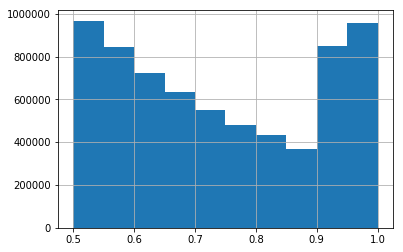

In [11]:
just_values.astype(float).hist()

Here we can see that the makers of the dataset has already set the treshold at 0.5.
We are content with this limit, meaning that we can use all of the tags without considering the confidence values.

Remove the confidence values:

In [12]:
tag_lists = autotags[1].map(lambda x: list(map(lambda y: y.split(':')[0], str(x).split(','))))

In [13]:
autotags['autotags'] = tag_lists
autotags.head()

,0,1,autotags
0,6985418911,"atoll:0.5220,bay:0.6380,beach:0.9530,coast:0.9...","[atoll, bay, beach, coast, harbor, lake, lakef..."
1,10201275523,"alley:0.7910,apartment:0.9290,architecture:0.9...","[alley, apartment, architecture, brownstone, b..."
2,2297552664,"curry:0.5170,dish:0.9600,food:0.9650,greens:0....","[curry, dish, food, greens, indoor, meal, past..."
3,7289030198,"art:0.5530,concert:0.9520,fire:0.5540,light pa...","[art, concert, fire, light painting, magenta, ..."
4,4140939180,"friends:0.9000,groupshot:1.0000,indoor:0.9330,...","[friends, groupshot, indoor, people]"


In [14]:
autotags = autotags.drop(1, axis=1)
autotags.head()

,0,autotags
0,6985418911,"[atoll, bay, beach, coast, harbor, lake, lakef..."
1,10201275523,"[alley, apartment, architecture, brownstone, b..."
2,2297552664,"[curry, dish, food, greens, indoor, meal, past..."
3,7289030198,"[art, concert, fire, light painting, magenta, ..."
4,4140939180,"[friends, groupshot, indoor, people]"


In [15]:
asd = pd.Series((val for val_list in autotags.autotags for val in val_list))

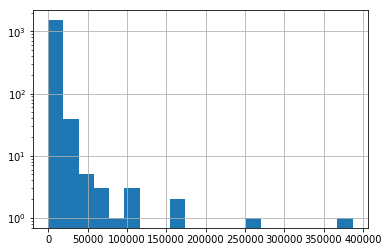

In [16]:
fig, ax = plt.subplots()
asd.value_counts().hist(bins=20)
ax.set_yscale('log')
#ax.set_xscale('log')

In [17]:
autotags.set_index(0, inplace=True)
dataset = dataset.join(autotags, on='Photo/video_identifier')
dataset.head()

,Photo/video_identifier,Photo/video_hash,User_NSID,User_nickname,Date_taken,Date_uploaded,Capture_device,Title,Description,User_tags,...,Photo/video_download_URL,License_name,License_URL,Photo/video_server_identifier,Photo/video_farm_identifier,Photo/video_secret,Photo/video_secret_original,Extension,Photos/video_marker_(0/1),autotags
Line_number,,,,,,,,,,,,,,,,,,,,,
0,6985418911,4e2f7a26a1dfbf165a7e30bdabf7e72a,39089491@N00,nino63004,2012-02-16 09:56:37.0,1331840483,Canon+PowerShot+ELPH+310+HS,IMG_0520,NaN,"canon,canon+powershot+hs+310,carnival+escatay,...",...,http://farm8.staticflickr.com/7205/6985418911_...,Attribution-NonCommercial-NoDerivs License,http://creativecommons.org/licenses/by-nc-nd/2.0/,7205,8,df7747990d,692d7e0a7f,jpg,0,"[atoll, bay, beach, coast, harbor, lake, lakef..."
1,10201275523,6ae91cc04fe06697c9404a5360b9b62,55289779@N00,booledozer,2013-10-09 15:30:13.0,1381464628,Panasonic+DMC-ZS10,Images+from+the+intersection+of+Parliament+and...,NaN,NaN,...,http://farm6.staticflickr.com/5465/10201275523...,Attribution-ShareAlike License,http://creativecommons.org/licenses/by-sa/2.0/,5465,6,3e6ea67c7f,f400826feb,jpg,0,"[alley, apartment, architecture, brownstone, b..."
2,2297552664,b61f252678da02eaff453bce575cb6,8134076@N03,nathalie.cone,2008-02-27 08:14:36.0,1204166915,Canon+PowerShot+S2+IS,denise%27s+peanut+chicken,recipe+here%3A+%3Ca+href%3D%22http%3A%2F%2Fall...,NaN,...,http://farm4.staticflickr.com/3171/2297552664_...,Attribution-NonCommercial-NoDerivs License,http://creativecommons.org/licenses/by-nc-nd/2.0/,3171,4,1ee0e8855d,bed1547a29,jpg,0,"[curry, dish, food, greens, indoor, meal, past..."
3,7289030198,b545e6a773632e2e65e6ecf1bf385,53430201@N03,sarabeephoto,2012-05-28 00:23:30.0,1338233199,Canon+EOS+DIGITAL+REBEL+XSi,blip+fest+2012+night+3,NaN,"blip,blip12ny,blipfest,blipfestival,blipfestiv...",...,http://farm8.staticflickr.com/7231/7289030198_...,Attribution-NonCommercial-NoDerivs License,http://creativecommons.org/licenses/by-nc-nd/2.0/,7231,8,1f1ba44113,bc36823aec,jpg,0,"[art, concert, fire, light painting, magenta, ..."
4,4140939180,7ef1a7715642be6fab2273718c876cae,12940050@N02,enjoiskate8,2009-11-21 08:03:30.0,1259417601,PENTAX+Corporation+PENTAX+K10D,IMGP7409,NaN,"2009,amsterdam,clinquest,fall,netherlands,nov,...",...,http://farm3.staticflickr.com/2565/4140939180_...,Attribution-NonCommercial-NoDerivs License,http://creativecommons.org/licenses/by-nc-nd/2.0/,2565,3,07aeded917,da7f4b048e,jpg,0,"[friends, groupshot, indoor, people]"


The user tags needs to be put into an array as well:

In [18]:
dataset.User_tags = dataset.User_tags.map(lambda x: x.split(','), na_action='ignore')
dataset.head()

,Photo/video_identifier,Photo/video_hash,User_NSID,User_nickname,Date_taken,Date_uploaded,Capture_device,Title,Description,User_tags,...,Photo/video_download_URL,License_name,License_URL,Photo/video_server_identifier,Photo/video_farm_identifier,Photo/video_secret,Photo/video_secret_original,Extension,Photos/video_marker_(0/1),autotags
Line_number,,,,,,,,,,,,,,,,,,,,,
0,6985418911,4e2f7a26a1dfbf165a7e30bdabf7e72a,39089491@N00,nino63004,2012-02-16 09:56:37.0,1331840483,Canon+PowerShot+ELPH+310+HS,IMG_0520,NaN,"[canon, canon+powershot+hs+310, carnival+escat...",...,http://farm8.staticflickr.com/7205/6985418911_...,Attribution-NonCommercial-NoDerivs License,http://creativecommons.org/licenses/by-nc-nd/2.0/,7205,8,df7747990d,692d7e0a7f,jpg,0,"[atoll, bay, beach, coast, harbor, lake, lakef..."
1,10201275523,6ae91cc04fe06697c9404a5360b9b62,55289779@N00,booledozer,2013-10-09 15:30:13.0,1381464628,Panasonic+DMC-ZS10,Images+from+the+intersection+of+Parliament+and...,NaN,NaN,...,http://farm6.staticflickr.com/5465/10201275523...,Attribution-ShareAlike License,http://creativecommons.org/licenses/by-sa/2.0/,5465,6,3e6ea67c7f,f400826feb,jpg,0,"[alley, apartment, architecture, brownstone, b..."
2,2297552664,b61f252678da02eaff453bce575cb6,8134076@N03,nathalie.cone,2008-02-27 08:14:36.0,1204166915,Canon+PowerShot+S2+IS,denise%27s+peanut+chicken,recipe+here%3A+%3Ca+href%3D%22http%3A%2F%2Fall...,NaN,...,http://farm4.staticflickr.com/3171/2297552664_...,Attribution-NonCommercial-NoDerivs License,http://creativecommons.org/licenses/by-nc-nd/2.0/,3171,4,1ee0e8855d,bed1547a29,jpg,0,"[curry, dish, food, greens, indoor, meal, past..."
3,7289030198,b545e6a773632e2e65e6ecf1bf385,53430201@N03,sarabeephoto,2012-05-28 00:23:30.0,1338233199,Canon+EOS+DIGITAL+REBEL+XSi,blip+fest+2012+night+3,NaN,"[blip, blip12ny, blipfest, blipfestival, blipf...",...,http://farm8.staticflickr.com/7231/7289030198_...,Attribution-NonCommercial-NoDerivs License,http://creativecommons.org/licenses/by-nc-nd/2.0/,7231,8,1f1ba44113,bc36823aec,jpg,0,"[art, concert, fire, light painting, magenta, ..."
4,4140939180,7ef1a7715642be6fab2273718c876cae,12940050@N02,enjoiskate8,2009-11-21 08:03:30.0,1259417601,PENTAX+Corporation+PENTAX+K10D,IMGP7409,NaN,"[2009, amsterdam, clinquest, fall, netherlands...",...,http://farm3.staticflickr.com/2565/4140939180_...,Attribution-NonCommercial-NoDerivs License,http://creativecommons.org/licenses/by-nc-nd/2.0/,2565,3,07aeded917,da7f4b048e,jpg,0,"[friends, groupshot, indoor, people]"


## Prepare for use

We might need to limit the amount of different tags, perhaps for both features (autotags) as well as the classes (user_tags), but at least for the classes, so let's take a look at this.

In [19]:
all_autotags = pd.Series((tag for tag_list in dataset.autotags.dropna() for tag in tag_list))

In [20]:
print("number of autotags:")
print("total: " + str(len(all_autotags)))
print("unique: " + str(len(all_autotags.unique())))
print("ratio autotags/item: " + str(len(all_autotags) / dataset.shape[0]))

number of autotags:
total: 6802159
unique: 1570
ratio autotags/item: 8.50269875


In [21]:
all_usertags = pd.Series((tag for tag_list in dataset.User_tags.dropna() for tag in tag_list))
print("number of user tags:")
print("total: " + str(len(all_usertags)))
print("unique: " + str(len(all_usertags.unique())))
print("ratio user_tags/item: " + str(len(all_usertags) / dataset.shape[0]))

number of user tags:
total: 2994374
unique: 601458
ratio user_tags/item: 3.7429675


Hmm the amount of unique user tags is a bit unnerving.. Let's find out the distribution of the user tags, how many occurrences there are of each unique tag.

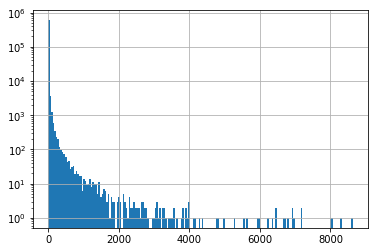

In [22]:
fig, ax = plt.subplots()
all_usertags.value_counts().hist(bins=200)
ax.set_yscale('log')

Seems to be at least 1000 tags that occur more than 5 times.

In [23]:
all_usertags.head()

0                     canon
1    canon+powershot+hs+310
2          carnival+escatay
3                    cruise
4                      elph
dtype: object

In [24]:
value_counts = all_usertags.value_counts()
value_counts

square                                                                                                                                                               8630
iphoneography                                                                                                                                                        8291
square+format                                                                                                                                                        8045
instagram+app                                                                                                                                                        7993
travel                                                                                                                                                               7199
2010                                                                                                                                                  

It seems that we have to limit the amount of tags to the X most common ones. We will however do this later, after we made sure that the items have multiple tags. We start with filtering this out.

### Filter out the user tags:

In [25]:
prepare_dataset = dataset[['User_tags', 'autotags']]
prepare_dataset.head(2)

,User_tags,autotags
Line_number,,
0,"[canon, canon+powershot+hs+310, carnival+escat...","[atoll, bay, beach, coast, harbor, lake, lakef..."
1,NaN,"[alley, apartment, architecture, brownstone, b..."


Drop nans, there are a lot of photos which does not have any user-added tags.

In [26]:
print(prepare_dataset.shape)
prepare_dataset = prepare_dataset.dropna()
print(prepare_dataset.shape)
prepare_dataset.head(2)

(800000, 2)
(463593, 2)


,User_tags,autotags
Line_number,,
0,"[canon, canon+powershot+hs+310, carnival+escat...","[atoll, bay, beach, coast, harbor, lake, lakef..."
3,"[blip, blip12ny, blipfest, blipfestival, blipf...","[art, concert, fire, light painting, magenta, ..."


In [27]:
#prepare_dataset.User_tags = prepare_dataset.User_tags.map(lambda photo_tags: 
#                                                          [tag for tag in photo_tags if tag in common_user_tags], 
#                                                          na_action='ignore')

IndentationError: unexpected indent (<ipython-input-27-1fdff0a82763>, line 2)

Filter out items with at least 5 user tags

In [28]:
asd = prepare_dataset.query('User_tags.str.len() > 5')
print("Number of items: " + str(asd.shape[0]) + ".")
print("First three: ")
asd.head(3)

Number of items: 182627.
First three: 


,User_tags,autotags
Line_number,,
0,"[canon, canon+powershot+hs+310, carnival+escat...","[atoll, bay, beach, coast, harbor, lake, lakef..."
3,"[blip, blip12ny, blipfest, blipfestival, blipf...","[art, concert, fire, light painting, magenta, ..."
4,"[2009, amsterdam, clinquest, fall, netherlands...","[friends, groupshot, indoor, people]"


In [29]:
prepare_dataset = asd

In [30]:
all_user_tags = pd.Series((tag for tag_list in prepare_dataset.User_tags for tag in tag_list))

In [31]:
user_value_counts = all_user_tags.value_counts()
user_value_counts[user_value_counts > 110]

nikon           5864
canon           5732
usa             4554
2012            4548
2010            4544
2011            4413
music           4412
travel          4372
california      4336
art             4314
2013            4149
2009            3942
2008            3667
nature          3598
party           3405
japan           3323
city            3247
people          3108
beach           3046
taiwan          3011
london          2998
2007            2978
wedding         2973
water           2900
summer          2859
park            2848
europe          2755
new+york        2679
canada          2637
france          2635
                ... 
activism         112
highlands        112
capitol          112
sheffield        112
d70s             112
trash            112
8                112
kittens          112
gay+pride        112
dock             112
28mm             112
aves             111
al               111
graff            111
en               111
singing          111
t%C3%BCrkiye 

In [32]:
common_user_tags = set(user_value_counts[user_value_counts > 110].index)
len(common_user_tags)

2015

In [33]:
prepare_dataset.User_tags = prepare_dataset.User_tags.map(lambda tag_list: [tag for tag in tag_list if tag in common_user_tags])

In [34]:
prepare_dataset.head()

,User_tags,autotags
Line_number,,
0,"[canon, cruise, powershot]","[atoll, bay, beach, coast, harbor, lake, lakef..."
3,[],"[art, concert, fire, light painting, magenta, ..."
4,"[2009, amsterdam, fall, netherlands, travel]","[friends, groupshot, indoor, people]"
10,"[k10d, pentax, spain, valencia]","[architecture, beam, bridge, building structur..."
18,[],"[adobe, ancient, architecture, art, brick, bui..."


Do longer than 5 filtering again:

In [35]:
asd = prepare_dataset.query('User_tags.str.len() > 5')
print("Number of items: " + str(asd.shape[0]) + ".")
print("First three: ")
asd.head(3)

Number of items: 50297.
First three: 


,User_tags,autotags
Line_number,,
31,"[america, arab, child, children, facebook, fre...","[arch, architecture, fort, fortification, goth..."
34,"[2004, august, canal, church, grand, health, i...","[architecture, belfry, building, campanile, ca..."
39,"[ancient, architecture, buildings, cambridge, ...","[friends, outdoor, people]"


In [36]:
prepare_dataset = asd
asd.shape

(50297, 2)

Unclear though if 50297 items is enough, but it is a start! This can also easily be increased by just using more photos.

In [37]:
all_asd = pd.Series((tag for tag_list in prepare_dataset.User_tags for tag in tag_list))
all_asd.value_counts()

canon                      3659
nikon                      3655
art                        2617
music                      2605
travel                     2605
city                       2508
usa                        2501
people                     2235
nature                     2193
california                 2090
2012                       2010
2010                       1991
2011                       1962
water                      1933
summer                     1798
photography                1792
park                       1776
2013                       1775
europe                     1758
road                       1745
new+york                   1720
beach                      1706
live                       1691
2009                       1691
street                     1664
sky                        1644
taiwan                     1615
party                      1609
photo                      1601
sign                       1579
                           ... 
ponies  

As can be seen, most tags are more than 5 and there are still 998 of them.

In [38]:
auto_tag_list = pd.Series((tag for tag_list in prepare_dataset.autotags for tag in tag_list))
user_tag_list = pd.Series((tag for tag_list in prepare_dataset.User_tags for tag in tag_list))
print("The average amount of autotags per item is " + str(len(auto_tag_list)/prepare_dataset.shape[0]) + ".")

The average amount of autotags per item is 9.910392269916695.


In [39]:
asd.head()

,User_tags,autotags
Line_number,,
31,"[america, arab, child, children, facebook, fre...","[arch, architecture, fort, fortification, goth..."
34,"[2004, august, canal, church, grand, health, i...","[architecture, belfry, building, campanile, ca..."
39,"[ancient, architecture, buildings, cambridge, ...","[friends, outdoor, people]"
126,"[%E9%A6%99%E6%B8%AF, farm, garden, hong+kong, ...","[blossom, calliandra, flower, geranium, hibisc..."
143,"[color, film, fujifilm, home, life, minolta]","[drawer, furniture, indoor]"


In [44]:
print("number of autotags:")
print("total: " + str(len(auto_tag_list)))
print("unique: " + str(len(auto_tag_list.unique())))
print("ratio autotags/item: " + str(len(auto_tag_list) / asd.shape[0]))
print("")
print("number of user tags:")
print("total: " + str(len(user_tag_list)))
print("unique: " + str(len(user_tag_list.unique())))
print("ratio user_tags/item: " + str(len(user_tag_list) / asd.shape[0]))

number of autotags:
total: 498463
unique: 1568
ratio autotags/item: 9.910392269916695

number of user tags:
total: 459308
unique: 2015
ratio user_tags/item: 9.131916416486073


Looks good!

In [41]:
prepare_dataset.head()

,User_tags,autotags
Line_number,,
31,"[america, arab, child, children, facebook, fre...","[arch, architecture, fort, fortification, goth..."
34,"[2004, august, canal, church, grand, health, i...","[architecture, belfry, building, campanile, ca..."
39,"[ancient, architecture, buildings, cambridge, ...","[friends, outdoor, people]"
126,"[%E9%A6%99%E6%B8%AF, farm, garden, hong+kong, ...","[blossom, calliandra, flower, geranium, hibisc..."
143,"[color, film, fujifilm, home, life, minolta]","[drawer, furniture, indoor]"


This is now ready to be used.

Let's save it so that it can be used by some other notebook.

In [43]:
prepare_dataset.to_pickle("results/preprocessed_user_auto_tags.pkl")

## Test of svm model